In [6]:
from pymatgen.ext.matproj import MPRester
from phonopy import Phonopy
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Initialiser l'API Materials Project
with MPRester("oZkH8kj10DOmI5dC") as m:
    structure = m.get_structure_by_material_id("mp-9124")
    phonon_bandstructure = m.get_phonon_bandstructure_by_material_id("mp-9124")

/usr/local/lib64/python3.6/site-packages/pymatgen/phonon/bandstructure.py:455: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/usr/local/lib64/python3.6/site-packages/pymatgen/phonon/bandstructure.py:456: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



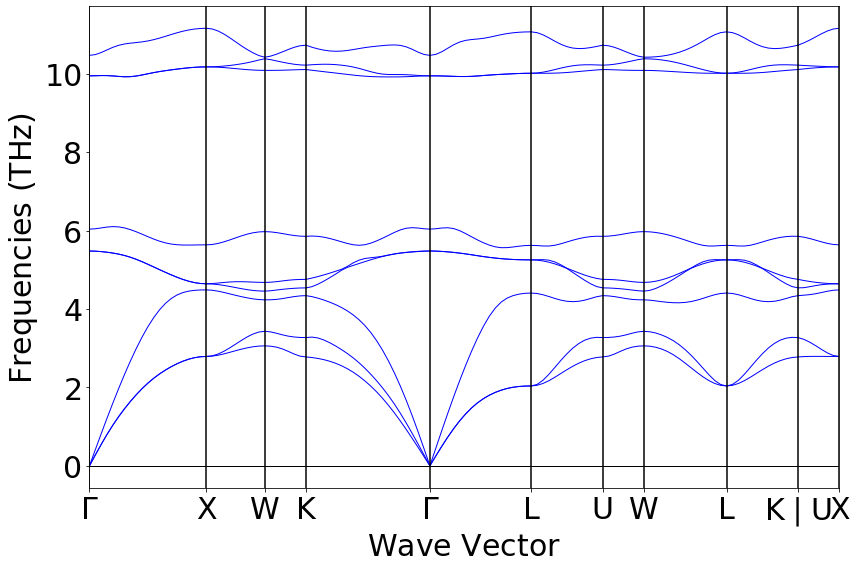

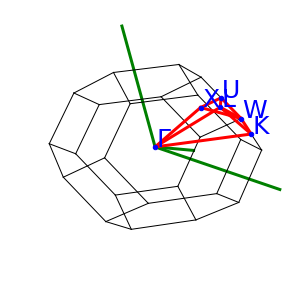

In [11]:
import matplotlib.pyplot as plt
from pymatgen.phonon import plotter
from pymatgen.phonon import bandstructure


ph_plot = plotter.PhononBSPlotter(phonon_bandstructure)
ph_plot.get_plot()
ph_plot.plot_brillouin()